In [1]:
#import libraries 
import openghg 
from openghg.analyse import ModelScenario
from openghg.retrieve import search_footprints, search_flux, get_footprint, get_flux, get_obs_surface, search, search_bc, get_bc
from matplotlib import pyplot as plt
import numpy as np
from cartopy import crs as ccrs
import pandas as pd
import xarray as xr
import skill_metrics as sm
from sklearn.metrics import root_mean_squared_error
import functions as f 

In [2]:
#define site and inlet
site = "bsd"
inlet = "248"

In [3]:
f.overlap(site, inlet) #function that finds the time period overlap between boundary condition, flux and footprint data

2024-10-16T15:46:38 INFO     INFO:openghg.util:No data found in the object store                       ]8;id=457839;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py\_user.py]8;;\:]8;id=130851;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py#382\382]8;;\
                             /user/work/zl21660/openghg/object_store, so we are treating this empty                
                             store as a zarr store.                                                                

                    INFO     INFO:openghg.util:No data found in the object store                       ]8;id=154407;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py\_user.py]8;;\:]8;id=327076;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py#382\382]8;;\
                             /user/work/zl21660/openghg/object_store, so we are treating this empty                
                             store as a zarr store.                                                                

                    INFO     INFO:openghg.util:No data found in the object store                       ]8;id=264968;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py\_user.py]8;;\:]8;id=633864;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py#382\382]8;;\
                             /user/work/zl21660/openghg/object_store, so we are treating this empty                
                             store as a zarr store.                                                                

('2018-01-01', '2021-08-31')

In [4]:
#define start and end dates
start_date = "2018-01-01"
end_date = " 2021-01-31"

Model scenario where observational data is added - calculate model pollution events and baseline then add them together

In [5]:
model_scenario1 = ModelScenario()   #set up model scenario 
model_scenario1.add_flux(species="ch4", domain="europe", store="old_shared_store_zarr")   #add flux
model_scenario1.add_bc(species="ch4", domain="europe", store="old_shared_store_zarr", bc_input = "camsv22r2_daily")  #add boundary conditions 
model_scenario1.footprint = get_footprint(site= site, inlet=inlet, domain="europe",species='inert' , store="old_shared_store_zarr")  #add footprint for desired site and inlet
model_scenario1.add_obs(site=site,species="ch4",inlet=inlet,store="obs_paris_2024_07_store") #add observed data 

model1 = model_scenario1.calc_modelled_obs(resample_to="1M", cache=True, recalculate=False) #model obs data without a baseline
model1 = model1.sel(time=slice(start_date,end_date))

baseline1 = model_scenario1.calc_modelled_baseline(resample_to="1M", output_units=1e-09, cache=True, recalculate=False) #calculate baseline with monthly average     
baseline1 = baseline1.sel(time=slice(start_date,end_date))

combined1 = model1 + baseline1

2024-10-16T15:46:39 INFO     INFO:openghg.util:No data found in the object store                       ]8;id=592325;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py\_user.py]8;;\:]8;id=994729;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py#382\382]8;;\
                             /user/work/zl21660/openghg/object_store, so we are treating this empty                
                             store as a zarr store.                                                                

                    INFO     INFO:openghg.analyse:Adding flux to model scenario                    ]8;id=139239;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py\_scenario.py]8;;\:]8;id=560142;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py#279\279]8;;\

                    INFO     INFO:openghg.util:No data found in the object store                       ]8;id=575417;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py\_user.py]8;;\:]8;id=985246;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py#382\382]8;;\
                             /user/work/zl21660/openghg/object_store, so we are treating this empty                
                             store as a zarr store.                                                                

                    INFO     INFO:openghg.analyse:Adding boundary_conditions to model scenario     ]8;id=312769;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py\_scenario.py]8;;\:]8;id=137676;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py#279\279]8;;\

                    INFO     INFO:openghg.util:No data found in the object store                       ]8;id=957587;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py\_user.py]8;;\:]8;id=324034;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py#382\382]8;;\
                             /user/work/zl21660/openghg/object_store, so we are treating this empty                
                             store as a zarr store.                                                                

                    INFO     INFO:openghg.util:No data found in the object store                       ]8;id=265953;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py\_user.py]8;;\:]8;id=647181;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py#382\382]8;;\
                             /user/work/zl21660/openghg/object_store, so we are treating this empty                
                             store as a zarr store.                                                                

2024-10-16T15:46:40 INFO     INFO:openghg.analyse:Adding obs_surface to model scenario             ]8;id=584243;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py\_scenario.py]8;;\:]8;id=561356;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py#279\279]8;;\

2024-10-16T15:46:47 INFO     INFO:openghg.analyse:Caching calculated data                         ]8;id=177850;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py\_scenario.py]8;;\:]8;id=587284;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py#1065\1065]8;;\

                    INFO     INFO:openghg.analyse:Caching calculated data                         ]8;id=227796;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py\_scenario.py]8;;\:]8;id=497237;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py#1533\1533]8;;\

Model scenario where observational data isn't added - calculate model pollution events and baseline then add them together

In [6]:
model_scenario2 = ModelScenario()   #set up model scenario 
model_scenario2.add_flux(species="ch4", domain="europe", store="old_shared_store_zarr")   #add flux
model_scenario2.add_bc(species="ch4", domain="europe", store="old_shared_store_zarr", bc_input = "camsv22r2_daily")  #add boundary conditions 
model_scenario2.footprint = get_footprint(site= site, inlet=inlet, domain="europe",species='inert' , store="old_shared_store_zarr")  #add footprint for desired site and inlet 

model2 = model_scenario2.calc_modelled_obs(resample_to="1M", cache=True, recalculate=False) #model obs data without a baseline
model2 = model2.sel(time=slice(start_date,end_date))

baseline2 = model_scenario2.calc_modelled_baseline(resample_to="1M", output_units=1e-09, cache=True, recalculate=False) #calculate baseline with monthly average     
baseline2 = baseline2.sel(time=slice(start_date,end_date))

combined2 = model2 + baseline2

                    INFO     INFO:openghg.util:No data found in the object store                       ]8;id=387948;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py\_user.py]8;;\:]8;id=690165;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py#382\382]8;;\
                             /user/work/zl21660/openghg/object_store, so we are treating this empty                
                             store as a zarr store.                                                                

                    INFO     INFO:openghg.analyse:Adding flux to model scenario                    ]8;id=360800;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py\_scenario.py]8;;\:]8;id=624388;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py#279\279]8;;\

                    INFO     INFO:openghg.util:No data found in the object store                       ]8;id=70173;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py\_user.py]8;;\:]8;id=933372;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py#382\382]8;;\
                             /user/work/zl21660/openghg/object_store, so we are treating this empty                
                             store as a zarr store.                                                                

                    INFO     INFO:openghg.analyse:Adding boundary_conditions to model scenario     ]8;id=395968;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py\_scenario.py]8;;\:]8;id=752721;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py#279\279]8;;\

                    INFO     INFO:openghg.util:No data found in the object store                       ]8;id=897917;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py\_user.py]8;;\:]8;id=717638;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py#382\382]8;;\
                             /user/work/zl21660/openghg/object_store, so we are treating this empty                
                             store as a zarr store.                                                                

2024-10-16T15:46:50 INFO     INFO:openghg.analyse:Caching calculated data                         ]8;id=179388;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py\_scenario.py]8;;\:]8;id=702452;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py#1065\1065]8;;\

2024-10-16T15:46:53 INFO     INFO:openghg.analyse:Caching calculated data                         ]8;id=985245;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py\_scenario.py]8;;\:]8;id=304503;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/analyse/_scenario.py#1533\1533]8;;\

Calculate modelled pollution events outside of openghg model scenario:

In [7]:
fp = get_footprint(site=site,store="old_shared_store_zarr", inlet=inlet, species="inert", domain = "europe")
fp = fp.data

flux = get_flux(species="ch4", store="old_shared_store_zarr", source = "edgar-annual-total", domain = "europe")
flux = flux.data

model3 = (flux.flux.reindex_like(fp.time, method="nearest") * fp.fp).sum(dim=["lat", "lon"])
model3 = model3.resample(time="1M").mean()
model3 = model3.sel(time=slice(start_date,end_date))

                    INFO     INFO:openghg.util:No data found in the object store                       ]8;id=741131;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py\_user.py]8;;\:]8;id=368967;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py#382\382]8;;\
                             /user/work/zl21660/openghg/object_store, so we are treating this empty                
                             store as a zarr store.                                                                

                    INFO     INFO:openghg.util:No data found in the object store                       ]8;id=448341;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py\_user.py]8;;\:]8;id=88636;file:///user/work/zl21660/Anaconda3/envs/openghg_inv/lib/python3.12/site-packages/openghg/util/_user.py#382\382]8;;\
                             /user/work/zl21660/openghg/object_store, so we are treating this empty                
                             store as a zarr store.                                                                

Modelled pollution events are plotted below, as expected all three methods give identical graphs. Different graphs use 10e-8 and 10e-9 but actual values are the same.

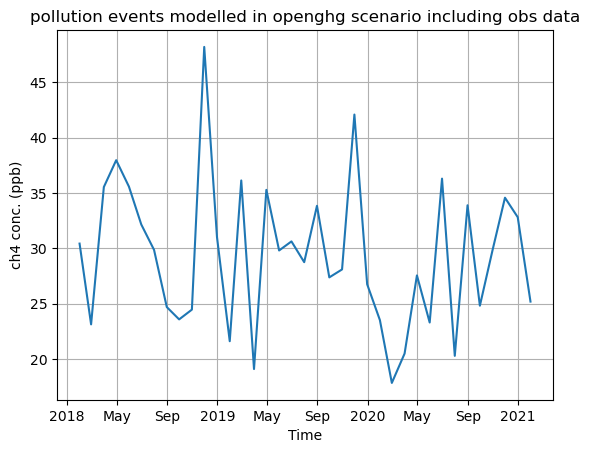

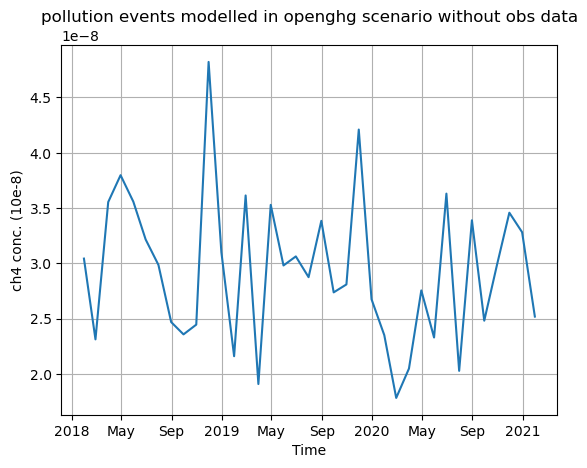

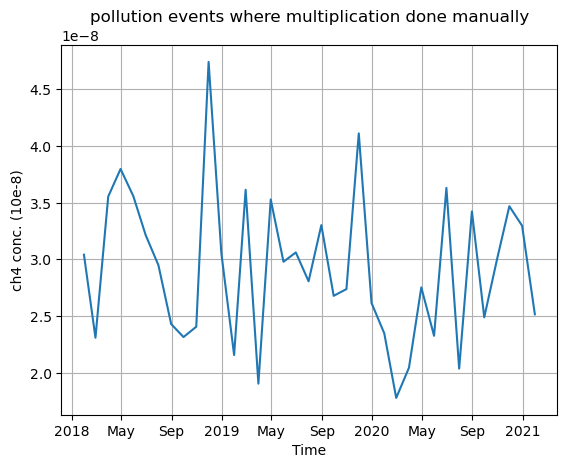

In [8]:
f.plot(model1, "pollution events modelled in openghg scenario including obs data", "Time", "ch4 conc. (ppb)") #function that plots a graph
f.plot(model2, "pollution events modelled in openghg scenario without obs data", "Time", "ch4 conc. (10e-8)") #function that plots a graph
f.plot(model3, "pollution events where multiplication done manually", "Time", "ch4 conc. (10e-8)") #function that plots a graph

Baselines caclulated with and without observational data included in model scenario shown below. As expected look identical.

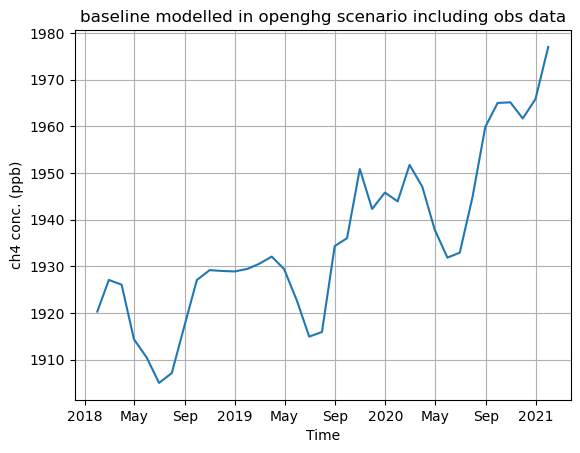

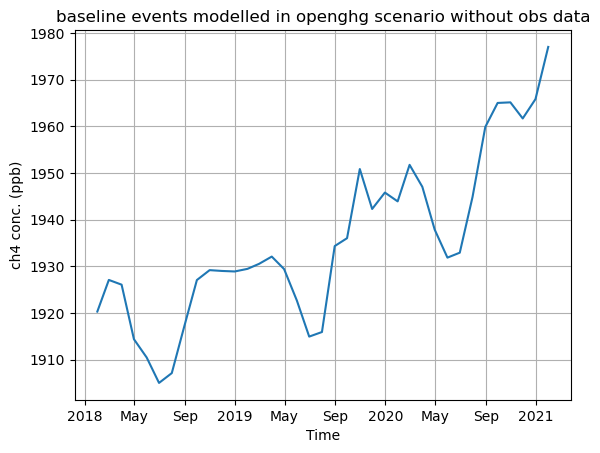

In [9]:
f.plot(baseline1, "baseline modelled in openghg scenario including obs data", "Time", "ch4 conc. (ppb)") #function that plots a graph
f.plot(baseline2, "baseline events modelled in openghg scenario without obs data", "Time", "ch4 conc. (ppb)") #function that plots a graph


Combined pollution event + baseline plotted below for both model scenarios. For some reason they are different despite the pollution event model and baseline model looking identical for both? For the model without the observational data the combined model is identical to the baseline

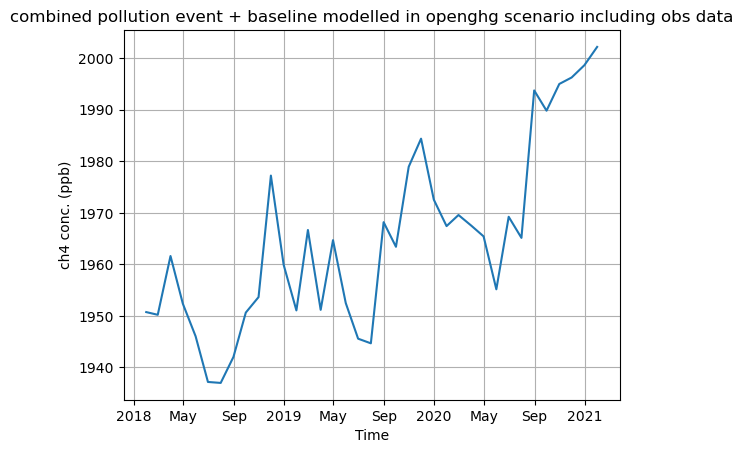

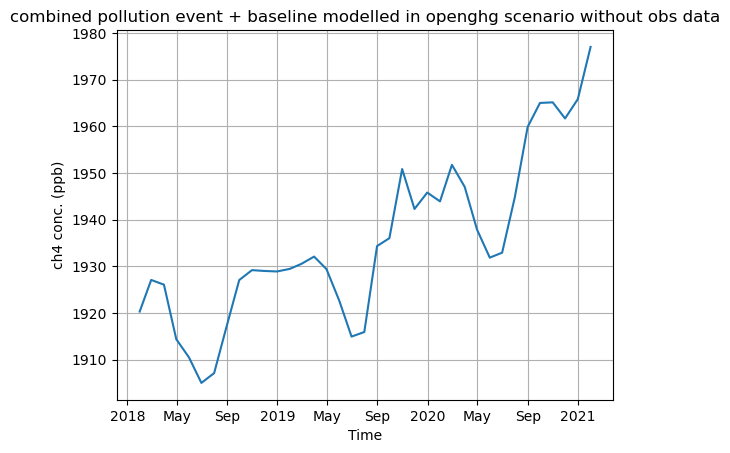

In [10]:
f.plot(combined1, "combined pollution event + baseline modelled in openghg scenario including obs data", "Time", "ch4 conc. (ppb)") #function that plots a graph
f.plot(combined2, "combined pollution event + baseline modelled in openghg scenario without obs data", "Time", "ch4 conc. (ppb)") #function that plots a graph